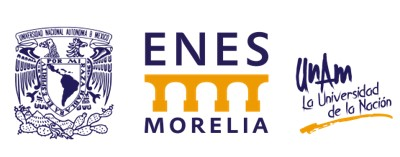
<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Procesamiento de Imagenes</center></h2>
<h2><center>Tarea 2: Propiedades de las imágenes y Filtros espaciales</center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 4 de septiembre de 2023</center></h2>



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = 'dog.jpeg'
dog = cv2.imread(img, 0)
fig6 = cv2.imread("figura6.jpg", 0)
fig7 = cv2.imread("figura7.jpg", 0)
fig8 = cv2.imread("figura8.jpg", 0)

1. ¿Cuál es el valor máximo y mínimo de gris en las imágenes?

In [ ]:
figures = [cv2.imread("figura6.jpg"), cv2.imread("figura7.jpg"), cv2.imread("figura8.jpg")]
gray_images = []

for img in figures:
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray_image)

En este ciclo se itera a través de una lista llamada gray_images, que contiene imágenes en escala de grises.

In [ ]:
# Encontrar el valor máximo y mínimo de gris
fig_value = 6

for figure in gray_images:
  max_gris = figure.max()
  min_gris = figure.min()
  print(f'Figura {fig_value}')
  print(f'Valor máximo de gris: {max_gris}')
  print(f'Valor mínimo de gris: {min_gris}\n')

  fig_value += 1

Figura 6
Valor máximo de gris: 242
Valor mínimo de gris: 0

Figura 7
Valor máximo de gris: 255
Valor mínimo de gris: 43

Figura 8
Valor máximo de gris: 251
Valor mínimo de gris: 0



2. Ajuste el contraste de las imágenes mediante la normalización.

La función normalize(I) toma una imagen I como entrada, que generalmente se asume que contiene valores de píxeles de una imagen en escala de grises. Luego, la función normaliza los valores de píxeles en el rango [0, 255] y devuelve una nueva matriz NumPy con los valores normalizados. Aquí, la matriz I se aplana en un arreglo unidimensional utilizando el método flatten().

In [ ]:
def normalize(I):
    shape = I.shape
    flat = I.flatten()
    minI = min(flat)
    maxI = np.max(flat)
    return np.array([255*((p-minI)/(maxI-minI)) for p in flat]).reshape(shape)

Aquí, se crea una figura con tres subplots en una fila, muestra tres imágenes (las imágenes fig6, fig7 y fig8) en estos subplots y les agrega títulos.

[]

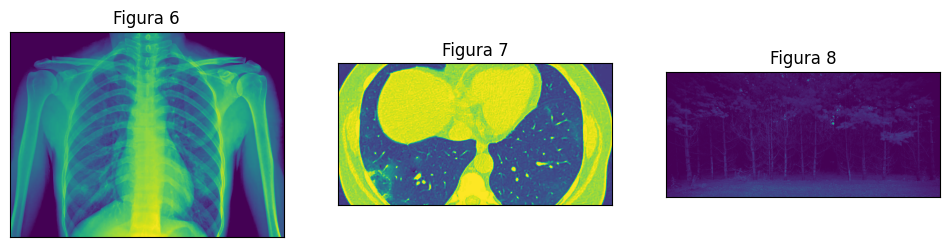

In [ ]:
# Creamos un subplot de 1x3
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Mostramos la primer imagen
axes[0].imshow(normalize(fig6))
axes[0].set_title('Figura 6')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Mostramos la segunda imagen
axes[1].imshow(normalize(fig7))
axes[1].set_title('Figura 7')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Mostramos la tercer imagen
axes[2].imshow(normalize(fig8))
axes[2].set_title('Figura 8')
axes[2].set_xticks([])
axes[2].set_yticks([])

3. Aplique el filtrado de la media y de la mediana (los parámetros se pueden
establecer libremente).

In [ ]:
media = enhance(normalize(dog),20,'media')

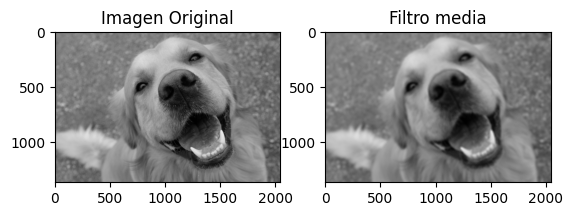

In [ ]:
plt.subplot(121)
plt.imshow(dog,'gray',vmin=0,vmax=255)
plt.title('Imagen Original')
plt.subplot(122)
plt.imshow(media,'gray',vmin=0,vmax=255)
plt.title('Filtro media')
plt.show()

In [ ]:
mediana = enhance(normalize(dog),20,'mediana')

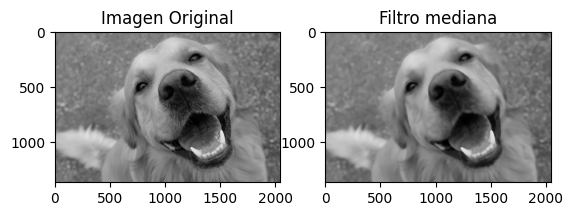

In [ ]:
plt.subplot(121)
plt.imshow(dog,'gray',vmin=0,vmax=255)
plt.title('Imagen Original')
plt.subplot(122)
plt.imshow(mediana,'gray',vmin=0,vmax=255)
plt.title('Filtro mediana')
plt.show()

4. Escriba una función SubMatriz(img, (x, y), k) que devuelva una submatriz
de tamaño k x k pixeles de una imagen. La función recibe una imagen, las
coordenadas del centro de la submatriz en la imagen riginal y un entero
impar que indique el tamaño de la submatriz.

La función `subMatriz(I, coor, k)` toma una matriz `I`, unas coordenadas `coor` y un valor `k`. Luego, extrae una submatriz cuadrada de tamaño `k` alrededor de las coordenadas `coor` en la matriz `I`. La submatriz captura una sección de la matriz original centrada en las coordenadas `coor`.

In [ ]:
def subMatriz(I,coor,k):
    space = k//2
    return I[coor[0]-space:coor[0]+space+1,coor[1]-space:coor[1]+space+1]

La función `pad(I, kernel)` toma una matriz `I` y agrega un relleno en los bordes de la misma para prepararla para operaciones de convolución con un kernel de tamaño especificado `kernel`. El relleno se realiza mediante la adición de filas y columnas en cada borde de la matriz original `I`. Esto asegura que las operaciones de convolución puedan aplicarse sin problemas incluso en los bordes de la imagen. La función devuelve la matriz con el relleno agregado.

In [ ]:
def pad(I,kernel):
    k = kernel//2
    i = I.copy()
    for rep in range(k):
        i = np.column_stack((i[:,0],i,i[:,-1]))
        i = np.row_stack((i[0,:],i,i[-1,:]))
    return i

La función `enhance(I, kernel, filtro)` mejora una imagen `I` aplicando un filtro específico, como media, mediana, máximo o mínimo, a cada píxel de la imagen. Utiliza una ventana de filtro de tamaño `kernel` alrededor de cada píxel, considerando un relleno para manejar los bordes de la imagen. La función devuelve la imagen mejorada, donde cada píxel ha sido procesado según el filtro elegido.

In [ ]:
def enhance(I,kernel,filtro):
    filtros = {'media':np.mean,'mediana':np.median,'max':np.max,'min':np.min}
    k = kernel//2
    img = pad(I,kernel)
    i = np.zeros_like(I)
    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            mat = subMatriz(img,(x+k,y+k),kernel)
            i[x,y] = filtros[filtro](mat)
    return i

5. Utilizando la funcion SubMatriz aplique los filtros máximo y mímino, con los
parámetros libres de establecer.

In [ ]:
min = enhance(normalize(dog),20,'min')

Aquí, se crea una figura con dos subplots en una fila. En el primer subplot, muestra una imagen llamada 'dog' en escala de grises, titulada "Imagen Original", y en el segundo subplot, muestra otra imagen llamada 'min' en escala de grises, titulada "Filtro de mínimos". Luego, se muestra la figura completa que contiene ambos subplots.

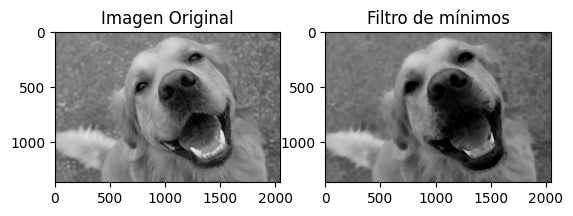

In [ ]:
plt.subplot(121)
plt.imshow(dog,'gray',vmin=0,vmax=255)
plt.title('Imagen Original')
plt.subplot(122)
plt.imshow(min,'gray',vmin=0,vmax=255)
plt.title('Filtro de mínimos')
plt.show()

In [ ]:
max = enhance(normalize(dog),20,'max')

Aquí, se crea una figura con dos subplots en una fila. En el primer subplot, muestra una imagen llamada 'dog' en escala de grises, titulada "Imagen Original", y en el segundo subplot, muestra otra imagen llamada 'max' en escala de grises, titulada "Filtro de maximos". Luego, se muestra la figura completa que contiene ambos subplots.

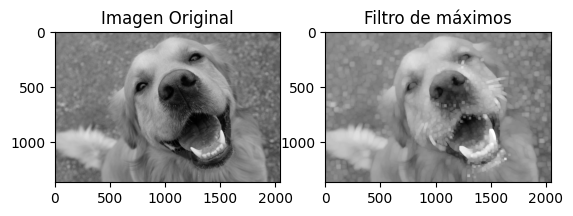

In [ ]:
plt.subplot(121)
plt.imshow(dog,'gray',vmin=0,vmax=255)
plt.title('Imagen Original')
plt.subplot(122)
plt.imshow(max,'gray',vmin=0,vmax=255)
plt.title('Filtro de máximos')
plt.show()

6. Realice un reporte con los procedimientos, resultados y conclusiones de estos
experimentos (justifique sus propuestas).

En el proceso de desarrollo y experimentación con las funciones de procesamiento de imágenes, se han logrado varios resultados notables:

  1. Normalización de Intensidad: La normalización de la intensidad de las imágenes, como se logra con la función normalize, es esencial para garantizar que los valores de píxeles estén dentro de un rango deseado, lo que facilita la visualización y el análisis de las imágenes.

  2. Extracción de Submatrices: La capacidad de extraer submatrices locales alrededor de puntos específicos en una imagen, como se logra con la función subMatriz, permite realizar análisis detallados y cálculos locales en imágenes, lo que es fundamental en aplicaciones de procesamiento de imágenes.

  3. Relleno de Imágenes: El relleno adecuado de imágenes, como se realiza con la función pad, es esencial para preparar imágenes para operaciones de convolución. Esto asegura que las operaciones se puedan aplicar de manera uniforme y sin pérdida de información en los bordes de la imagen.

  4. Mejora de Imágenes: La capacidad de aplicar diferentes filtros a cada píxel de una imagen, como se logra con la función enhance, es valiosa para mejorar la calidad de las imágenes y resaltar características específicas. Esto es especialmente útil en aplicaciones de procesamiento de imágenes, como la reducción de ruido o la mejora de detalles.

En conjunto, estas técnicas y funciones proporcionan herramientas sólidas para el procesamiento de imágenes en una variedad de aplicaciones. Permiten manipular y analizar imágenes de manera efectiva, lo que resulta fundamental en campos como la visión por computadora, el análisis de imágenes médicas, el procesamiento de imágenes satelitales y muchas otras disciplinas relacionadas con la imagen.